In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Load the mask image
mask1 = cv2.imread('3.jpg', 0)  # Load as grayscale
mask2 = cv2.imread('4.jpg', 0)  # Load as grayscale

In [53]:
mask1.shape

(379, 500)

In [16]:
def show(img):
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show

In [38]:
def find_center_and_farthest(mask):
    # Find contours
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if contours:
        # Sort contours by area and get the largest (and possibly the only) contour
        contours = sorted(contours, key=cv2.contourArea, reverse=True)
        largest_contour = contours[0]
        
        # Calculate the moments of the largest contour
        M = cv2.moments(largest_contour)
        
        # Calculate x, y coordinate of center
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
        else:
            # This case corresponds to the situation where the contour area is 0
            cX, cY = 0, 0
        center_point = (cX, cY)

        max_distance = -1
        farthest_point = None
        
        # Go over every point in the contour to find the farthest one from the center
        for p in largest_contour:
            p = tuple(p[0])
            distance = np.sqrt((p[0] - cX)**2 + (p[1] - cY)**2)
            if distance > max_distance:
                max_distance = distance
                farthest_point = p  
    else:
        raise Exception("No contours in mask")

    return center_point, max_distance

In [43]:
p1, _ = find_center_and_farthest(mask1)
p2, l = find_center_and_farthest(mask2)
img1 = mask1.copy()
img2 = mask2.copy()
cv2.circle(img1, p1, 1, 1, thickness=1)
cv2.circle(img2, p2, 1, 1, thickness=1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

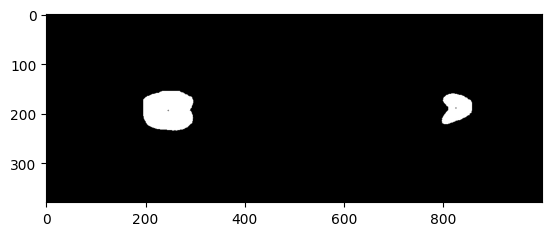

In [44]:
show(np.hstack([img1, img2]))

In [55]:
blank = np.zeros((512, 512, 3), dtype=np.uint8)
arrow_color = (255, 0, 0) # BGR for blue
# Calculate the direction vector (dx, dy) from p1 to p2
dx, dy = p2[0] - p1[0], p2[1] - p1[1]
# Calculate the magnitude of the direction vector
mag = np.sqrt(dx**2 + dy**2)
if mag != 0:
    dx, dy = dx / mag, dy / mag
# Extend p2 by the desired distance in the direction of the vector
p2_extended = (int(p2[0] + dx * l), int(p2[1] + dy * l))
cv2.arrowedLine(blank, p1, p2_extended, arrow_color, thickness=1, line_type=16, shift=0, tipLength=0.05)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

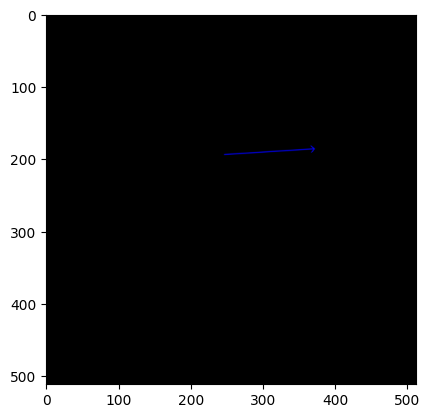

In [52]:
show(blank)